In [ ]:
import numpy as np
import pandas as pd
import io #google colab
from google.colab import files #google colab
import scipy.stats as stats
import statsmodels.stats.weightstats as stest
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,kruskal#kruskal is replacement of annova for non parametric test
import statsmodels.api as sm
from statsmodels.formula.api import ols #ols=ordinaryLeastSquares. Creates a model from dataframe
from  statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


http://pytolearn.csd.auth.gr/d1-hyptest/11/distros.html

PMF(Probability Mass Function) is for probabilities of descrete random variable.

PDF(Probability Density Function) is for probabilities of continuous random variable. PDF Returns a probability that variable X takes a specific value.

CDF(Cumulative Distribution Function) is applicable for describing the distribution of random variables either it is continuous or discrete.
Given a value x0 cdf returns the cumulative probability that x gets a value less or equal to x0, or in other words "lies in the interval (-inf, x0]". 

PPF(Percent Point Function) (or inverse cumulative distribution function)
ppf returns the value x of the variable that has a given cumulative distribution probability (cdf). Thus, given the cdf(x) of a x value, ppf returns the value x itself, therefore, operating as the inverse of cdf

sf: Survival function
sf returns the probability that the variate x gets a value that is greater than a specific value x0

ISF : Inverse Survival function
ISF returns the value x of the variable that has a given survival function (sf). Thus, given the sf(x) of a x value, isf returns the value x itself, therefore, operating as the inverse of sf

In [ ]:
#Binomial (discrete)
# for finding probabiltity of exact k true outcomes out of n total outcomes where probability of true is p
scipy.stats.binomial.pmf(k,n,p)

#other ones

scipy.stats.binomial.cdf()#cumulative propbaility
scipy.stats.binomial.sf()#survival function


In [ ]:
#bernoulli is used when only two outcomes are possible (head/tail)(goal/miss)(pass/fail)
#calculate probability for a goal for a free kick(x=k=1) for a player with 70%(p=0.7) goal rate
scipy.stats.bernoulli.pmf(k=1,p=0.7)
scipy.stats.bernoulli.cdf()



In [ ]:
#uniform distribution (discrete) is when all the values have equal probabilities.
#probability of choosing k as value of x out of range min value of x as low and max value of x as high(max+1) when all values of x are equally likely
randint.pmf(k,low,high)

#probability of choosing 3 or 4 out of {1,2,3,4,5,6}
req_prob=randint.pmf(k=3,low=1,high=7)+randint.pmf(k=4,low=1,high=7)

#uniform distribution (continuous) 

scipy.stats.uniform.pmf()
scipy.stats.uniform.cdf()
scipy.stats.uniform.sf()

#for a range 0-200 of continuous uniform disribution
#probability of 50-150 can be calculated by cum_prob_150 - cum_prob_50
req_prob=scipy.stats.uniform.cdf(x=150,loc=0,scale=200)-scipy.stats.uniform.cdf(x=50,loc=0,scale=200)

In [ ]:
#Normal(continuous)
scipy.stats.normal.pdf()#single range #the value of pdf at a particular point is always zero 0

#when required value is a, avg=x, var=y std=np.sqrt(y) z=(a-x)/std

scipy.stats.normal.cdf(z)#cumulative(left), probability of value less than a 

scipy.stats.normal.sf(z)#(1-cdf) cumulative right, probability of value greater than a

In [ ]:
# sampling
random.choices() #draw sample with replacement
random.sample() #draw sample without replacement

In [ ]:
#poission
#its a frequency distribution which gives the probability of a number of independent events occurring in a fixed time.
scipy.stats.poission.pmf()
scipy.stats.poission.cdf()
scipy.stats.poission.sf()

In [ ]:
#if x is desired outcome of n samples which belong to population N
#the number of desired outcomes out of Population N can be given by:
N=50
n=13
x=8
p_samp=x/n
#Estimation of desired outcome from the population
num_out=N*p_samp

#misc
Coefficient of variance= std/mean...................... is used for selecting a feature with least variance


Margin Of error/sampling error = z * std / sqrt(n)

sampling error=samplemean-pop.mean........................when no confidence interval available

In [ ]:
#margin of error

# Margin Of error/sampling error = z * std / sqrt(n)

#sample n
n=100
std=0.15 #=15%
conf_level=90%
#which makes alpha = 1-conf_interval = 10% =0.1
#since we are trying to find interval q= alpha/2
z_aplha_by_2=np.abs(round(stats.norm.isf(q=0.1/2),4))#isf gives z stat value
error=(z_alpha_by_2 * std)/np.sqrt(n)

In [ ]:
#confidence interval when mean and std are given(continuous)

x_bar=45000 #sample_avg
conf_interval=0.95 #95% conf interval
pop_std=4000
n=250
interval_95=stats.norm.interval(conf_interval,loc=x_bar,scale=pop_std/np.sqrt(n))
print(interval_95)

interval_99=stats.norm.interval(alpha=0.99,loc=x_bar,scale=pop_std/np.sqrt(n))
print(interval_99)

(44504.16397415635, 45495.83602584365)
(44348.361002958416, 45651.638997041584)


In [ ]:
#confidence interval when probability is given(discrete)
N=50
n=13
x=8
p=8/13
alpha=0.99
stats.norm.interval(0.99,loc=p,scale=np.sqrt((p*(1-p))/n))

(0.26782280814713805, 0.9629464226220927)

# The point estimate for the average is np.mean() of the sample

##Check for noramlity Shapiro
H0: data is normally distributed(skew=0)

H1: data in not normally distributed(skew!=0)

##Check for variance Levene
H0: variance are equal

H1: variance are not equal



In [ ]:
stats.shapiro(x)
stats.levene(sample1,sample2...samplen)

In [ ]:
#hypothesis testing


#rejecting H0:

#based on pval:
#pval<=significance(0.05)

#based on conf interval
#Mu0 doesnt lie in confidence interval

##based on critical regions

#for two tailed test
#Mu!=Mu0
#abs(z)>z_alpha/2

#for left tailed test
#Mu<Mu0
#z<-z_alpha

#for right tailed test
#Mu>Mu0
#z>z_alpha


# z_calc

z_calc=(x_bar-Mu)/(pop_std/np.sqrt(n))

def z_test(pop_mean,pop_std,n,samp_mean):
  z_score=(samp_mean-pop_mean)/(pop_std/np.sqrt(n))
  return z_score

#z from pval
stats.norm.ppf(1-pval)

#pval
pval=stats.norm.cdf(z_score)#left tailed
pval=stats.norm.sf(z_score)#right tailed

#only for two tailed test
req_pval=pval*2


#interval
stats.norm.interval(alpha,loc=x_bar,scale=pop_std/np.sqrt(n)) #check if the claimed value lies within the interval


#type1 error is probability of wrongly rejecting true null hypothesis(alpha)
#type2 error is porbability of wrongly accepting false null hypothesis(beta)
#(1-beta) is power of test i.e accpeting correctly rejecting false null hypothesis

#calculate power of ztest
power.zt_ind_solve_power() # from statsmodels library
#alpha is fixed beta is controlled

#ztest inbuilt:
statsmodels.stats.weightstats.ztest(x1=array,value=Mu,alternative='smaller'/'larger'/'two-sided')


#for less that 30 data points
stats.ttest_1samp(a=array,popmean=Mu)


#z_crit
stats.norm.isf(q)#q=1-alpha




#Two sample Ztest

def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, value, n1, n2):      

denominator = np.sqrt((samp_std_1**2 )/ n1) + ((samp_std_2**2)/ n2))  

zscore = ((samp_mean_1 - samp_mean_2) - (value)) / denominator

return zscore


In [ ]:
#two sample ttest

#stats.ttest_ind(a=array1,b=array2)

#stats.ttest_rel(a=array1,b=array2)

In [ ]:
z_stat=(75-60)/(30/np.sqrt(45))
print(z_stat)

print(stats.norm.sf(z_stat))

3.3541019662496843
0.0003981150787954058


# z = stats.norm.isf(q=0.01/2) ....for z critical two sided

# z = stats.norm.isf(q=0.010) ....for z critical  one sided

#Critical values:
stats.norm.isf(q=0.05)...... zdistibution

stats.t.isf(q=0.05,df=n-1).....tdistribution........n is size of sample.....one sample

stats.t.isf(q=0.05,df=(n1+n2)-2).....tdistribution........n is size of sample.....twosample

stats.chi2.isf(q=0.05,df=(cols-1)*(rows-1)).............if only one column is present its rows - 1

In [ ]:
#test of proportion
#one sample
z = (sample_prop - specified_prop) /np.sqrt ( specified_prop * (1 - specified_prop) / n)
#rejecting H0:

#based on pval:
#pval<=significance(0.05)

#based on conf interval
#Mu0 doesnt lie in confidence interval

##based on critical regions

#for two tailed test
#Mu!=Mu0
#abs(z)>z_alpha/2

#for left tailed test
#Mu<Mu0
#z<-z_alpha

#for right tailed test
#Mu>Mu0
#z>z_alpha

statsmodels.stats.proportion.proportions_ztest(count, nobs, value=test_prop, alternative='two-sided', prop_var=False)#for two sample value= 0


#standard error for proportion
se=z_crit*(np.sqrt(p*(1-p)/n))#

In [ ]:
samp_prop=105/361
specified_prop=0.25
z=(samp_prop-specified_prop)/np.sqrt(specified_prop*(1-specified_prop)/361)
print(z)
pval=stats.norm.sf(z)
print(pval)

1.7928245201151534
0.03650049373124949


In [ ]:
#Test of proportions 
#two sample
p_bar=(x1+x2)/(n1+n2)=((n1*p1)+(n2*p2))/(n1+n2)#n1,n2 are samples p1,p2 are proportions of specific items

z=(p1-p2)/np.sqrt(p_bar*(1-p_bar)*((1/n1)+(1/n2)))
#based on pval:
#pval<=significance(0.05)

#based on conf interval
#Mu0 doesnt lie in confidence interval

##based on critical regions

#for two tailed test
#Mu!=Mu0
#abs(z)>z_alpha/2

#for left tailed test
#Mu<Mu0
#z<-z_alpha

#for right tailed test
#Mu>Mu0
#z>z_alpha


statsmodels.api.stats.proportions_ztest(Sample_1,Sample_2)

In [ ]:
p1=78/100
p2=65/70
print(p1,p2)
p_bar=round(((100*p1)+(70*p2))/(100+70),2)
print(p_bar)
z=(p1-p2)/np.sqrt(p_bar*(1-p_bar)*((1/100)+(1/70)))
print(z)
p_val=stats.norm.cdf(z)
print(p_val)

0.78 0.9285714285714286
0.84
-2.600520156052018
0.00465412753578429


In [ ]:
#non parametric test for one sample

scipy.stats.wilcoxon(diff,alternative)

sample=[9.1,10.1,9.9,9.9,10,9.8,9.7,9.8,9.9,8.6]
diff=[i-10 for i in sample]
scipy.stats.wilcoxon(diff,alternative='less')

#non parametric test for two sample paired

scipy.stats.wilcoxon(sample_1,sample_2,alternative)

before=[2.7,1.1,1.4,0.9,0.9]
after=[1.3,1.4,1.1,1.3,1.9]
scipy.stats.wilcoxon(before,after,alternative='greater')

#non parametric test for two sample unpaired

##ranksums
scipy.stats.stats.ranksums(sample1,sample2)

a=[32,31,33,46]
b=[49,20,58,55,52]
scipy.stats.stats.ranksums(a,b)#scipy.stats.stats.ranksums(a,b,alternative='less') may work if new version

#mannwhitneyu
scipy.stats.stats.mannwhitneyu(sample1,sample2,alternative)
a=[32,31,33,46]
b=[49,20,58,55,52]
scipy.stats.stats.mannwhitneyu(a,b,alternative='less')

In [ ]:
#Non-Parametric equivalent of annova
scipy.stats.kruskal(sample1,sample2,sample3)

#Non-parametric posthoc
scikit_posthocs.posthoc_conover(dataframe,val_col,group_col)

In [ ]:
#Chi-Square goodness of fit

#H0: obs=exp

#H1: obs!=exp

stats.chisquare(f_obs=observed vals,f_exp=expected vals)



In [ ]:
#Chi-Square Test for Independence

#H0 : The variables are independent

#H1 : The variables are not independent (i.e. variables are dependent)

chistat,pval,dof,arr=stats.chi2_contingency(observed=pd.crosstab(df['CAT'],df['CAT'],correction=False)

#anova

It is used to check the equality of population means for more than two independent samples. Each group is considered as a treatment. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the Shapiro-Wilk Test. Also, the population variances should be equal; this can be tested using the Levene's Test.

The null and alternative hypothesis is given as:

H0 : The averages of all treatments are the same.

H1 : At least one treatment has a different average.




In [ ]:
#A=df[df['ethnicity']=='group A']['Total_score']

#B=df[df['ethnicity']=='group B']['Total_score']

#C=df[df['ethnicity']=='group C']['Total_score']

#perform shapiro and levene on ABC

#if data is normal and having equal variance

stats.f_oneway(A,B,C)


#aov_table
formula='avg_score ~ ethnicity' #one way annova

formula='avg_score ~ ethnicity+other categorical+ethnicity:other category'#two way annova


model=ols(formula,df).fit()

aov_table=anova_lm(model,typ=1)

aov_table

In [ ]:
#post-hoc

#tukeyhsd when equal number of obsrvations are present else scheffe

MultiComp=statsmodels.sandbox.stats.multicomp.MultiComparison(data=df_machine['Strength'],groups=df_machine['machine'])
MultiComp.tukeyhsd().summary()

#scheffe

MannwhitneyuResult(statistic=4.0, pvalue=0.08895479749349122)

In [ ]:
X= statsmodels.stats.multicomp.pairwise_tukeyhsd(endog=independent, groups=category, alpha= 1-CI)#aplha is 0.05 in case of 95% conf interval

>>> from statsmodels.examples.try_tukey_hsd import cylinders, cyl_labels
>>> from statsmodels.stats.multicomp import MultiComparison
>>> cardata = MultiComparison(cylinders, cyl_labels)
>>> results = cardata.tukeyhsd()
>>> results.plot_simultaneous()

#NON parametric alternative for anova

H0: median is equal for all groups

H1: median is not equal for all groups

stats.kruskal(a-group,b-group,c-group)

#Probability
#combination
def com(n,r):

comb = factorial(n)/(factorial(r)* factorial(n-r))

return comb

prob = com(number of desired outcomes in set ,r) / com(all outcomes in set ,r)

#alternative

from itertools import combinations

a=len(list(combinations([array of desired outcomes],r)

b=len(list(combinations([array of all outcomes],r)

p=a/b


#Mutually exclusive 
Mutually exclusive events arent independent

if events are mutually exclusive then addup the probabilities

addition rule for mutually exclusive events p(A U B)=p(A)+p(B)

addition for mutually non exclusive events P(A U B)=P(A) + P(B) - P(A n B)

#mutually independent
multiplication rule for independent events p(AnB)=p(A).p(B)

alternatively p(A)=p(A|B) for mutually independent events

multiplication rule for non-independent events p(AnB)=p(A).p(B|A)

alternatively p(B|A)=p(AnB)/p(A)

#Bayes theorem
p(h|e)=(p(e|h)/p(e))*p(h)

#Binomial Probability distribution function **discrete**
P(x)=n!/(x!*(n-x)!)

p(x) is probability of getting x sucesses in n trails

mean/avg of binomial distribution is n*p

std=root(n*p*(1-p))

n is number of trails p is probability of success.

stats.binom.pmf(k=array,n=nobs,p=given prob)......outpout is probability of each element in array

stats.binom.cdf(k=array,n=nobs,p=given prob)..........for left hand side probability

stats.binom.sf(k=array,n=nobs,p=given prob)...........for right hand side probability

#poisson Distribution **% or rate**
stats.poisson.pmf(n=array of possible numbers, rate=given rate).....gives an array of propbabiliry of all the possible numbers.

if the array passed is in form of 0,1,2,3 poisson [4] gives the probability of number 4

for a probability of 3 or less than 3 is given by poisson[0]+poisson[1]+poisson[2]+poisson[3]

for a probability of greater than 3 is given by 1 - (poisson[0]+poisson[1]+poisson[2]+poisson[3])

#normal Probability distribution function/gaussian distribution **continuous**
mean=median=mode

+-1 std has 68% of the data 2/3

+- 2 std has 95% of the data 19/20

+-3 std has 99.7% of the data 997/1000

for problem a - Calculate the z value

z=(x-Mu)/std

stats.norm.cdf(z).................this outputs probability for less than x

stats.norm.cdf(x,loc=Mu,scale=std)....optimised form using the original values

1-stats.norm.sf(x,loc=Mu,scale=std)...this outputs probability for greater than x

stats.norm.cdf(x2,loc=Mu,scale=std)-stats.norm.cdf(x1,loc=Mu,scale=std)....this outputs the probability of values between x2 and x1 where x2>x1



# for interval
##<sample size greater than 30>
stats.norm.interval(alpha=0.9,loc=xbar,scale=std/np.sqrt(n))...................
##<sample size less than 30>
stats.t.interval(alpha=0.9,loc=xbar,scale=std/np.sqrt(n),df=n-1)...................
##mathematical formula
lower_value=round(np.mean(samp)-z*np.std(samp)/np.sqrt(n)))

upper_value=round(np.mean(samp)+z*np.std(samp)/np.sqrt(n)))
##proportion interval formula
p_samp=true_obs/sample

stats.norm.interval(alpha,loc=p_samp,scale=np.sqrt(p_samp*(1-p_samp)/n)

In [ ]:
#stats.wilcoxon(array1,array2,alternatives=({"two-sided", "greater", "less"}).............paired sample
#stats.mannwhitneyu(array1,array2,alternatives=(None, 'two-sided', 'less', 'greater'))............independent sample when arrays are of same size
#stats.ranksums(array1,array2)......... independent samples
#stats.wilcoxon(x-checkVal,{"two-sided", "greater", "less"})

#Prince Distribution Plot one sided tests.

1.4072912811497253
0.920329483175748
z value: 1.6448536269514729


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


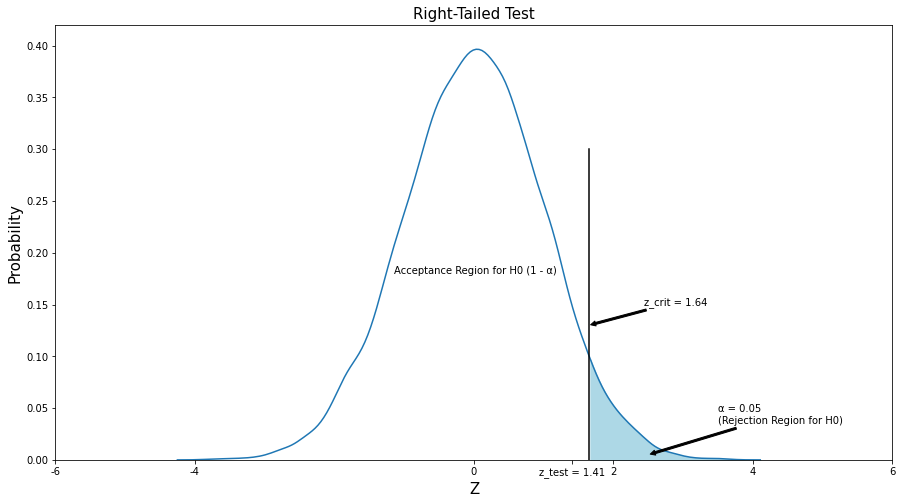

In [ ]:
n = 75
pop_mean = 175
samp_mean = 176.3
samp_std = 8
CI = 0.95
alpha = 0.05  # use this for checking

# H0: mu<=175
# H1: mu>175
def z_test(pop_mean,samp_std,n,samp_mean):
    zscore=(samp_mean-pop_mean)/(samp_std/np.sqrt(n))
    return zscore
z_score=z_test(pop_mean,samp_std,n,samp_mean)
print(z_score)
#pval
pval=stats.norm.cdf(z_score)
print(pval)
## plotting.
plt.rcParams['figure.figsize'] = [15,8]

X = stats.norm.rvs(size = 20000, random_state = 10)
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)
print('z value:',z)
# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]

# drawing z line
plt.plot(x, y, color = 'black')

# coloring
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')
# labeling the regions
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 (1 - α)')
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.005), xytext = (3.5, 0.035), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.13), xytext = (z+0.8, 0.15), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


# general annotation.

plt.xticks(ticks = [-6, -4, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()


#Prince Distribution Plot Two sided tests

-2.3717082451262854
1.64
z value: 1.6448536269514729


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


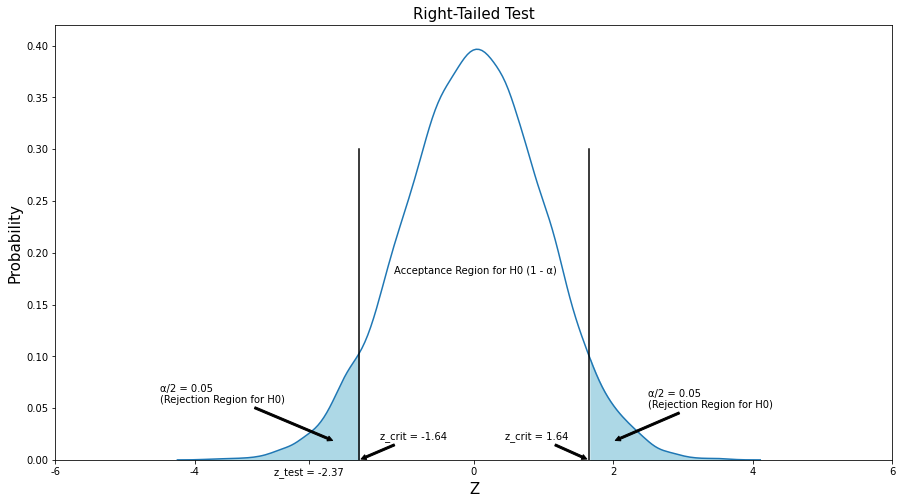

In [ ]:
# type your code here
# type your code here

# H0 : mu = 25
# H1 : mu != 25

n = 40
pop_mean = 25
pop_std = 4.8
samp_mean = 23.2

def z_test(pop_mean, pop_std, n, samp_mean):
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))
    return z_score

z_score = z_test(pop_mean, pop_std, n, samp_mean)
print(z_score)

CI = 0.95
z_critical = round(stats.norm.isf(q = 0.05),2)
print(z_critical)

plt.rcParams['figure.figsize'] = [15,8]

X = stats.norm.rvs(size = 20000, random_state = 10)
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)
print('z value:',z)
# plot a vertical line at z-value

# +z value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')
# -z value
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# coloring
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')
ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')


# labeling the regions
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 (1 - α)')
plt.annotate(s = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (2, 0.018), xytext = (2.5, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (-2, 0.018), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# general annotation.

plt.xticks(ticks = [-6, -4, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()



In [ ]:
a